# Pharmaceuticals analysis
For this analysis, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how the treatments compare according to to the following:
* The most important drugs are Capomulin, Infubinol, Ketapril, and Placebo
* Show how the tumor volume changes over time for each treatment.
* Show how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* Show the number of mice still alive through the course of treatment (Survival Rate)
* Compare the total % tumor volume change for each of the most important drugs across the full 45 days.
* Find how reliable results information is

# Main observations
Scatter plot and error bars were used to visualize the tumor volume changes over time, after analyzing the plot the following was concluded:
* From the main drugs, only Capomulin reduced the tumor volume.

* From the 10 drugs, only Capomulin and Ramicane reduced the tumor volume.

* The tumor volume variability increased along the time for all drugs.


Scatter plot and error bars also were used to visualize the number of metastatic sites changes over time, after analyzing the plot the following was concluded:
* From the main drugs, Capomulin showed the lowest increase of metastatic and Ketapril the highest increase.

* From the 10 drugs, Capomulin and Ramicane showed the lowest increases and Placebo and Ketapril the higher increases.

* The number of metastatic sites variability was high in general for all drugs and also increased along the time.

Other observation from the main drugs
* The survival rate for the mice which were medicated with Capomulin was over 80%, while the survival rate for other mice was above 50%

In [32]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from copy import copy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the datasets into a single dataset
dataset = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how="outer")
dataset.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [33]:
#  Notes

# 1.- For the four main treatments, I didn't take the 
# highest values of treatments results, but the four in the examples, this because 
# "importance" can have many other factors other than treatment results.
# 2.- I removed comments from code after the code got repetitive, this 
# to avoid unnecessary repetitive comments


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_volume_mean = dataset.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [34]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_sem = dataset.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
tumor_volume_sem = tumor_volume_sem.reset_index()
tumor_volume_sem.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [35]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Tumor Volume"

grouped_data = dataset.groupby(["Drug", "Timepoint"])

# Calculate the standard error of the mean for each group
sems = grouped_data["Tumor Volume (mm3)"].agg(sem)

# Transform the data into a dataframe with columns for each drug 
sems_df = sems.unstack(level=0)

#Create the dataframe
sem_tumor_volume_df = pd.DataFrame(sems_df)

sem_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [36]:
type(sem_tumor_volume_df)

pandas.core.frame.DataFrame

In [37]:
# Create a dataframe wich contains a column for each drug storing the value of "Tumor Volume"

mean_df = grouped_data['Tumor Volume (mm3)'].mean()

mean_df = mean_df.reset_index()

# Pivot the mean dataframe to create a new dataframe with columns for each drug
pivot_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

mean_tumor_volume_df = pd.DataFrame(pivot_df)

mean_tumor_volume_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [38]:
mean_tumor_volume_df

mean_tumor_volume_at_45 = mean_tumor_volume_df.loc[45].reset_index(name='Tumor Volume')
mean_tumor_volume_at_45 = mean_tumor_volume_at_45.rename(columns={'Drug': 'Drug name'})
mean_tumor_volume_at_45.set_index('Drug name', inplace=True)
mean_tumor_volume_at_45.head(10)

,Tumor Volume
Drug name,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ketapril,70.662958
Naftisol,69.265506
Placebo,68.084082
Propriva,66.258529
Ramicane,34.955595
Stelasyn,68.438310


In [39]:
drugs_of_interest = ["Capomulin", "Ketapril", "Infubinol", "Placebo"]
mean_tumor_volume_at_45_interest = mean_tumor_volume_at_45.loc[mean_tumor_volume_at_45.index.isin(drugs_of_interest)]
mean_tumor_volume_at_45_interest.head()

,Tumor Volume
Drug name,
Capomulin,36.236114
Infubinol,65.755562
Ketapril,70.662958
Placebo,68.084082


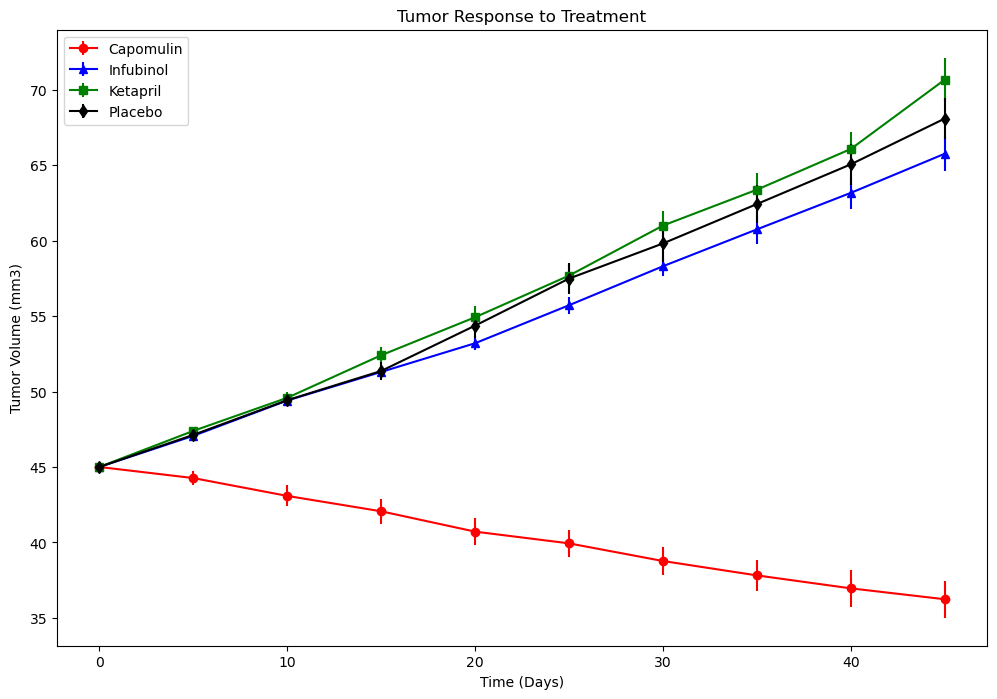

In [40]:
#Depict the tumor volume over time for the main four treatments and its standard error

grouped_df = dataset.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].agg(["mean", "sem"])
grouped_df = grouped_df.reset_index()

pivot_df = grouped_df.pivot(index="Timepoint", columns="Drug", values="mean")

# Plot the mean tumor volume over time for each drug
plt.figure(figsize=(12, 8))
plt.errorbar(x=pivot_df.index, y=pivot_df["Capomulin"], yerr=grouped_df.loc[grouped_df["Drug"] == "Capomulin", "sem"], fmt="o-", color="red", label="Capomulin")
plt.errorbar(x=pivot_df.index, y=pivot_df["Infubinol"], yerr=grouped_df.loc[grouped_df["Drug"] == "Infubinol", "sem"], fmt="^-", color="blue", label="Infubinol")
plt.errorbar(x=pivot_df.index, y=pivot_df["Ketapril"], yerr=grouped_df.loc[grouped_df["Drug"] == "Ketapril", "sem"], fmt="s-", color="green", label="Ketapril")
plt.errorbar(x=pivot_df.index, y=pivot_df["Placebo"], yerr=grouped_df.loc[grouped_df["Drug"] == "Placebo", "sem"], fmt="d-", color="black", label="Placebo")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best")
plt.show()

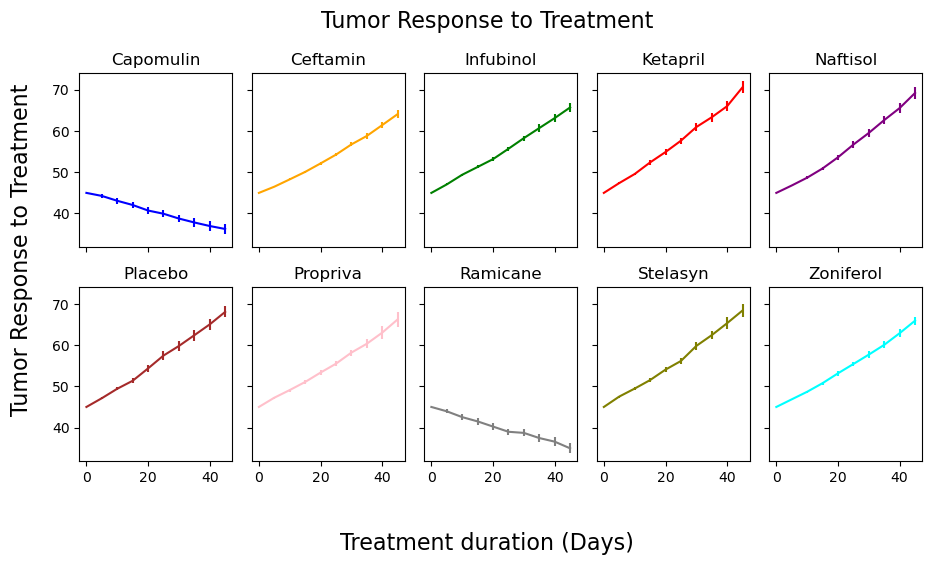

In [41]:
#Depict the tumor volume over time by treatment type and its standard error

drugs = pivot_df.columns

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(9, 5), sharex=True, sharey=True)

fig.suptitle("Tumor Response to Treatment", fontsize=16)

fig.text(0.5, -0.1, "Treatment duration (Days)", ha="center", fontsize=16)
fig.text(-0.03, 0.5, "Tumor Response to Treatment", va="center", rotation="vertical", fontsize=16)

axs = axs.ravel()

for i, drug in enumerate(drugs):
    axs[i].errorbar(pivot_df.index, pivot_df[drug], yerr=sems_df[drug], fmt="-",color = colors[i], label=drug)
    axs[i].set_title(f"{drug}")

plt.tight_layout()
plt.show()


## Metastatic Response to Treatment

In [42]:
# Store the the number of metastatic sites Data Grouped by Drug and Timepoint 

metastatic_sites_mean = dataset.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
metastatic_sites_mean = metastatic_sites_mean.reset_index()
metastatic_sites_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [43]:
# Store the Standard Error of the number of metastatic sites Grouped by Drug and Timepoint

metastatic_sites_sem = dataset.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
metastatic_sites_sem = metastatic_sites_sem.reset_index()
metastatic_sites_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [44]:
# Create a dataframe wich contains a column for each drug storing the number of "Metastatic Sites"

metastatic_sites_mean_pivot = metastatic_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_sites_mean_df = pd.DataFrame(metastatic_sites_mean_pivot)
metastatic_sites_mean_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [45]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Metastatic Sites"

metastatic_sites_sem_pivot = metastatic_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metastatic_sites_sem_df = pd.DataFrame(metastatic_sites_sem_pivot)
metastatic_sites_sem_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [46]:
metastatic_sites_mean_at_45 = metastatic_sites_mean_df.loc[45].reset_index(name='Metastatic Spread')
metastatic_sites_mean_at_45 = metastatic_sites_mean_at_45.rename(columns={'Drug': 'Drug name'})
metastatic_sites_mean_at_45.set_index('Drug name', inplace=True)
metastatic_sites_mean_at_45.head(10)

,Metastatic Spread
Drug name,
Capomulin,1.476190
Ceftamin,2.692308
Infubinol,2.111111
Ketapril,3.363636
Naftisol,2.538462
Placebo,3.272727
Propriva,2.571429
Ramicane,1.250000
Stelasyn,1.727273


In [47]:
drugs_of_interest = ["Capomulin", "Ketapril", "Infubinol", "Placebo"]
metastatic_sites_mean_at_45_interest = metastatic_sites_mean_at_45.loc[metastatic_sites_mean_at_45.index.isin(drugs_of_interest)]
metastatic_sites_mean_at_45_interest.head()

,Metastatic Spread
Drug name,
Capomulin,1.476190
Infubinol,2.111111
Ketapril,3.363636
Placebo,3.272727


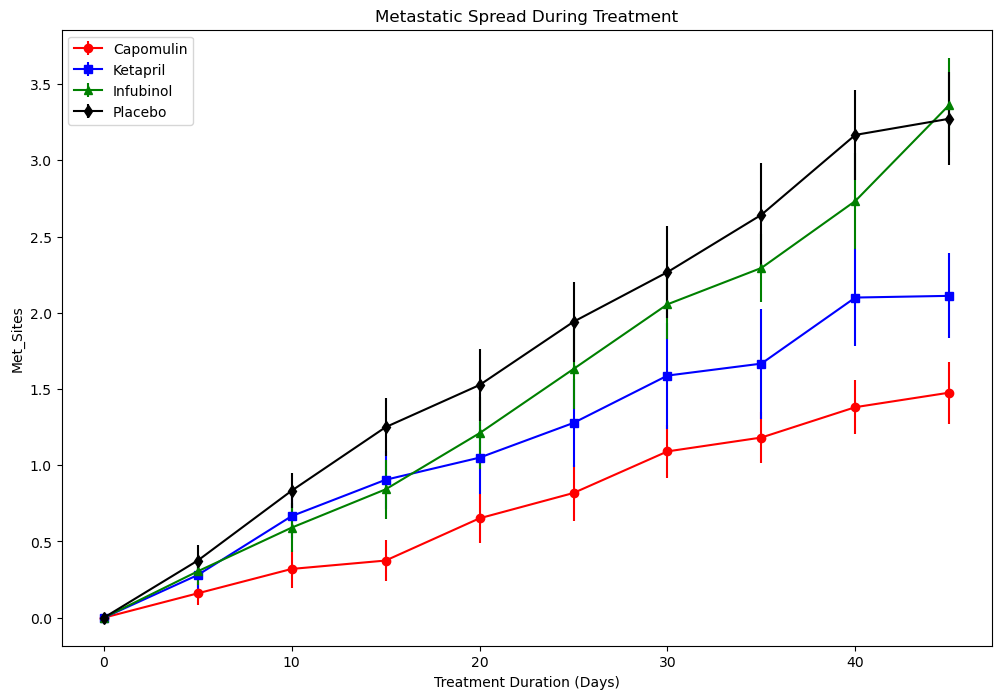

In [48]:
#Depict the number of metastatic sites over time for the main four treatments and its standard error

grouped_met_df = dataset.groupby(["Drug", "Timepoint"])["Metastatic Sites"].agg(["mean", "sem"])
grouped_met_df = grouped_met_df.reset_index()

pivot_met_df = grouped_met_df.pivot(index="Timepoint", columns="Drug", values="mean")

plt.figure(figsize=(12, 8))
plt.errorbar(x=pivot_met_df.index, y=pivot_met_df["Capomulin"], yerr=grouped_met_df.loc[grouped_met_df["Drug"] == "Capomulin", "sem"], fmt="o-", color="red", label="Capomulin")
plt.errorbar(x=pivot_met_df.index, y=pivot_met_df["Infubinol"], yerr=grouped_met_df.loc[grouped_met_df["Drug"] == "Ketapril", "sem"], fmt="s-", color="blue", label="Ketapril")
plt.errorbar(x=pivot_met_df.index, y=pivot_met_df["Ketapril"], yerr=grouped_met_df.loc[grouped_met_df["Drug"] == "Infubinol", "sem"], fmt="^-", color="green", label="Infubinol")
plt.errorbar(x=pivot_met_df.index, y=pivot_met_df["Placebo"], yerr=grouped_met_df.loc[grouped_met_df["Drug"] == "Placebo", "sem"], fmt="d-", color="black", label="Placebo")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met_Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best")
plt.show()

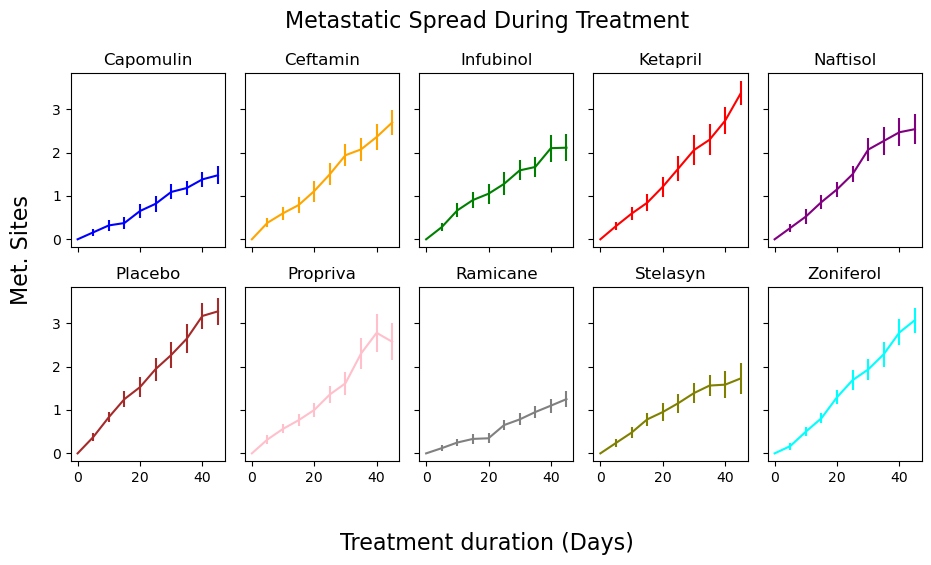

In [49]:
#Depict the number of metastatic sites over time by treatment type and its standard error

drugs = metastatic_sites_mean_pivot.columns

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(9, 5), sharex=True, sharey=True)
axs = axs.ravel()

fig.suptitle("Metastatic Spread During Treatment", fontsize=16)

fig.text(0.5, -0.1, "Treatment duration (Days)", ha="center", fontsize=16)
fig.text(-0.03, 0.5, "Met. Sites", va="center", rotation="vertical", fontsize=16)

for i, drug in enumerate(drugs):
    axs[i].errorbar(metastatic_sites_mean_pivot.index, metastatic_sites_mean_pivot[drug], yerr=metastatic_sites_sem_pivot[drug], fmt="-",color = colors[i], label=drug)
    axs[i].set_title(f"{drug}")

plt.tight_layout()
plt.show()


## Survival Rates

In [50]:
# Store the number of mice Data Grouped by Drug and Timepoint 

mice_count = dataset.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mice_count = mice_count.reset_index()
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [51]:
# Create a dataframe wich contains a column for each drug storing the number of mice 

mouse_count = dataset.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mouse_count = mouse_count.reset_index()

mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse ID"]

mouse_count_df = pd.DataFrame(mouse_count_pivot)

mouse_count_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


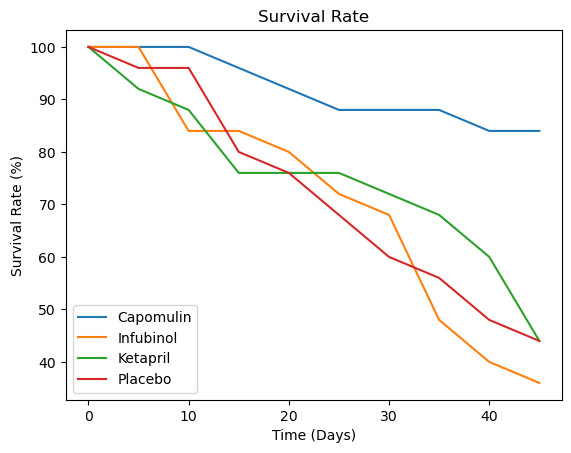

In [52]:
#Depict the survival rate over time for the most important treatments

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Loop through the list of drugs
fig, ax = plt.subplots()
for drug in drugs:
    ax.plot(survival_rates.index, survival_rates[drug], label=drug)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc="best")
ax.set_title("Survival Rate")
plt.show()

In [53]:
# Calculate a new dataframe which stores the survival rate of the mice per treatmen by timepoint 

mice_count_pivot = mice_count.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
initial_mice_count = mice_count_pivot.loc[0, :]
survival_rates = mice_count_pivot.divide(initial_mice_count, axis=1) * 100

survival_rates_df = pd.DataFrame(survival_rates)
survival_rates_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


In [54]:
survival_rates_df = pd.DataFrame(survival_rates)
survival_rates_at_45 = survival_rates_df.loc[45].reset_index(name='Survival rate')
survival_rates_at_45 = survival_rates_at_45.rename(columns={'Drug': 'Drug name'})
survival_rates_at_45.set_index('Drug name', inplace=True)
survival_rates_at_45.head(10)


,Survival rate
Drug name,
Capomulin,84.000000
Ceftamin,52.000000
Infubinol,36.000000
Ketapril,44.000000
Naftisol,52.000000
Placebo,44.000000
Propriva,26.923077
Ramicane,80.000000
Stelasyn,42.307692


In [55]:
drugs_of_interest = ["Capomulin", "Ketapril", "Infubinol", "Placebo"]
survival_rates_at_45_interest = survival_rates_at_45.loc[survival_rates_at_45.index.isin(drugs_of_interest)]
survival_rates_at_45_interest.head()

,Survival rate
Drug name,
Capomulin,84.0
Infubinol,36.0
Ketapril,44.0
Placebo,44.0


## Summary Bar Graph

In [56]:
# Calculate the volume change in percent for the main treatments

# Calculate the volume change for each treatment
volume_change = pivot_df.iloc[-1] - pivot_df.iloc[0]
volume_change_percent = volume_change / pivot_df.iloc[0] * 100

# Create a dataframe with volume_change_percent's tittle as Change(%)
volume_change_percent_df = pd.DataFrame({
    "Change (%)": volume_change_percent
})

volume_change_percent_df.head(10)

,Change (%)
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


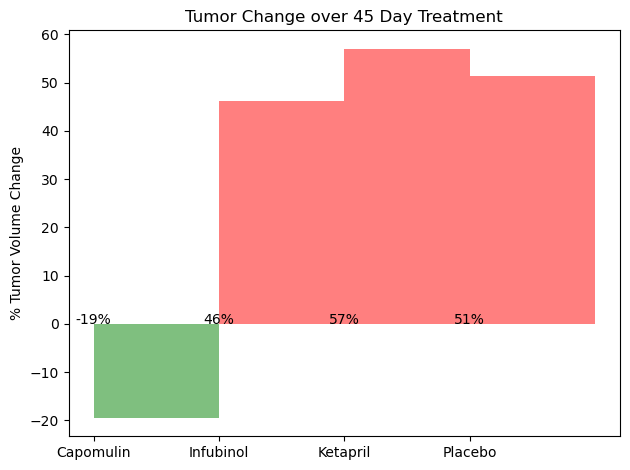

In [57]:
#Depict the percentage of change in tumor volume for the most important treatments

drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
volume_change_percent_df = volume_change_percent_df.loc[drugs]

# Create a bar plot to show the volume change for each treatment
fig, ax = plt.subplots()
bar_positions = range(len(volume_change_percent_df))

# Loop color bar colors depending on precentage
for i, val in enumerate(volume_change_percent_df["Change (%)"]):
    if val >= 0:
        color = "red"
    else:
        color = "green"
    ax.bar(i, val, color=color,width=1, align="edge",alpha=0.5)
   

ax.set_xticks(bar_positions)
ax.set_xticklabels(volume_change_percent_df.index)
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change over 45 Day Treatment")

# Show the percentage change for each bar in the y label=0
for i, val in enumerate(volume_change_percent_df['Change (%)']):
    ax.text(i, 0, '{:.0f}%'.format(val), ha='center')

plt.tight_layout()
plt.show()

# Quartiles, outliers and boxplots

In [58]:
# Find max timepoint for each mouse

max_tp_df = pd.DataFrame(dataset.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(dataset, max_tp_df, on='Mouse ID')
merged_df.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,f234,Stelasyn,0,45.000000,0,35
1,f234,Stelasyn,5,47.313491,0,35
2,f234,Stelasyn,10,47.904324,0,35
3,f234,Stelasyn,15,48.735197,1,35
4,f234,Stelasyn,20,51.112713,2,35
5,f234,Stelasyn,25,52.178602,2,35
6,f234,Stelasyn,30,56.873817,2,35
7,f234,Stelasyn,35,57.748758,2,35
8,x402,Stelasyn,0,45.000000,0,45
9,x402,Stelasyn,5,46.327570,1,45


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = dataset.groupby('Drug')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head(10)

,Mean,Median,Standard Deviation,SEM
Drug,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.957935,51.820584,6.453240,0.483691
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.106357,52.331228,7.574995,0.543853


In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create subset dataframe representing only the four following drug regimens
# ***NOTE*** must run previous cells in order for this cell to work

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.7818634578
Lower Bound for Capomulin: 20.704561654099997
Upper Bound for Capomulin: 51.8320154853
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536722200002
Lower Bound for Ramicane: 17.912664466599995
Upper Bound for Ramicane: 54.3068113554
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135162700002
Lower Bound for Infubinol: 36.83290494555
Upper Bound for Infubinol: 82.74144559635
Number of Infubinol outliers: 0
IQR for Ceftamin: 15.5777521833
Lower Bound for Ceftamin: 25.355449574450002
Upper Bound for Ceftamin: 87.66645830765
Number of Ceftamin outliers: 0
IQR for Ketapril: 13.152155349599994
Lower Bound for Ketapril: 36.99186242070001
Upper Bound for Ketapril: 89.60048381909999
Number of Ketapril outliers: 0
IQR for Naftisol: 17.4841106672
Lower Bound for Naftisol: 25.853344091800004
Upper Bound for Naftisol: 95.78978676060001
Number of Naftisol outliers: 0
IQR for Placebo: 15.191386484599995
Lower Bound for Placebo: 30.155821958800008
Upper 

In [61]:
import pandas as pd

# Define the data
data = {'Drug': ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'],
        'IQR': [7.7818634578, 9.098536722200002, 11.477135162700002, 15.5777521833, 13.152155349599994, 17.4841106672, 15.191386484599995, 13.447910630400003, 16.438606626899997, 16.805853525699995],
        'Lower Bound': [20.704561654099997, 17.912664466599995, 36.83290494555, 25.355449574450002, 36.99186242070001, 25.853344091800004, 30.155821958800008, 28.951103037699994, 27.94235961145, 24.779522174950007],
        'Upper Bound': [51.8320154853, 54.3068113554, 82.74144559635, 87.66645830765, 89.60048381909999, 95.78978676060001, 90.92136789719999, 82.7427455593, 93.69678611904999, 92.00293627774998],
        'Outliers': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df.head(10)


,Drug,IQR,Lower Bound,Upper Bound,Outliers
0,Capomulin,7.781863,20.704562,51.832015,0
1,Ramicane,9.098537,17.912664,54.306811,0
2,Infubinol,11.477135,36.832905,82.741446,0
3,Ceftamin,15.577752,25.355450,87.666458,0
4,Ketapril,13.152155,36.991862,89.600484,0
5,Naftisol,17.484111,25.853344,95.789787,0
6,Placebo,15.191386,30.155822,90.921368,0
7,Propriva,13.447911,28.951103,82.742746,0
8,Stelasyn,16.438607,27.942360,93.696786,0
9,Zoniferol,16.805854,24.779522,92.002936,0


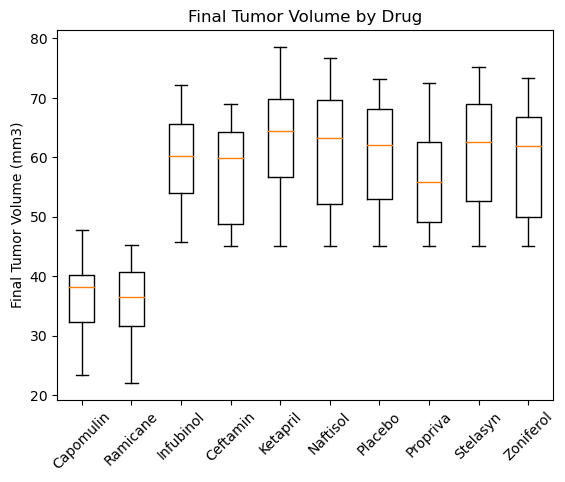

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'])
plt.xticks(rotation=45)
plt.show()